# Introduction

<div class="alert alert-block alert-warning">
<font color=black><br>

**What?** Partial dependence & conditional expectation plots

<br></font>
</div>

# Import modules

In [2]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from time import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from pylab import rcParams
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor

# Import dataset

<div class="alert alert-block alert-info">
<font color=black><br>

- y the target is the house price
- Center target to avoid gradient boosting init bias.  

<br></font>
</div>

In [4]:
cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data, columns = cal_housing.feature_names)
y = cal_housing.target

y -= y.mean()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [5]:
X.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24


# 1-way partial dependence with different models

<div class="alert alert-block alert-info">
<font color=black><br>

- MLPRegressor = Multi Layer Perceptron Regresson
- We configured a pipeline to scale the numerical input features. 
- Importantly, this tabular dataset has very different ranges for its features. 
- Neural networks tend to be **very sensitive** to features with varying scales and forgetting to preprocess the numeric feature would lead to a very poor model.

<br></font>
</div>

In [7]:
est = HistGradientBoostingRegressor()
est.fit(X_train, y_train)
print(f"Test R2 score: {est.score(X_test, y_test):.2f}")

Test R2 score: 0.85


# Both DPD and ICE

<div class="alert alert-block alert-info">
<font color=black><br>

- kind = both -> PDP + ICE
- kind = average -> PDP
- kind = individual -> ICE 

<br></font>
</div>

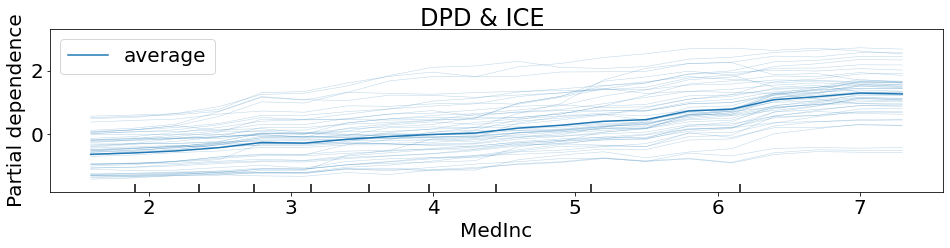

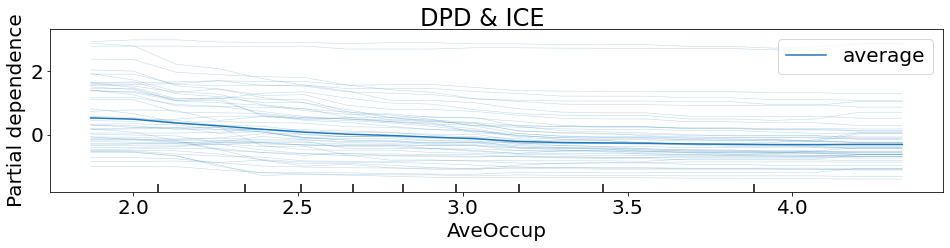

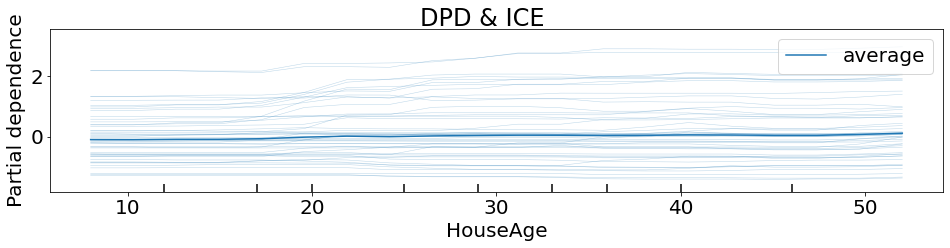

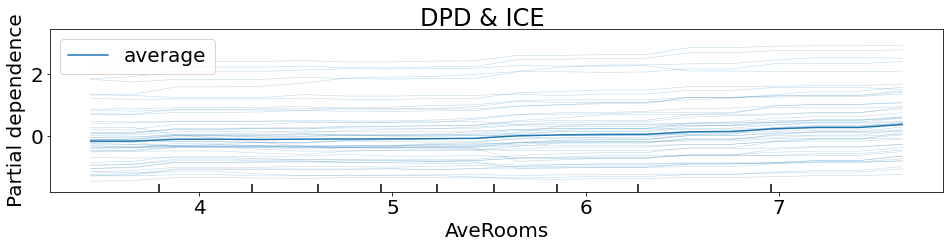

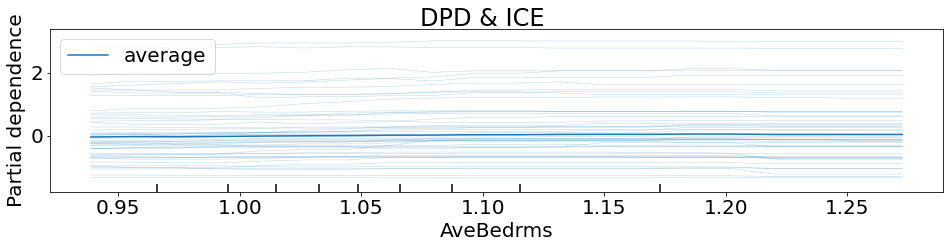

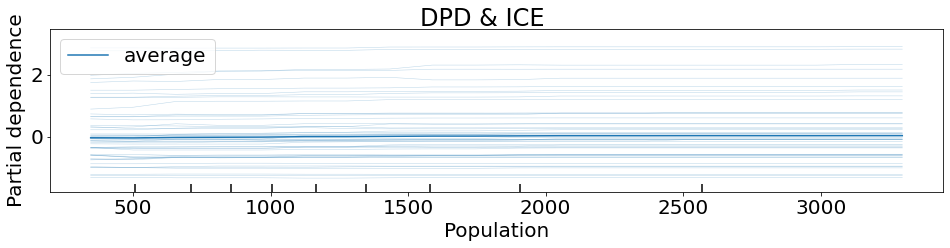

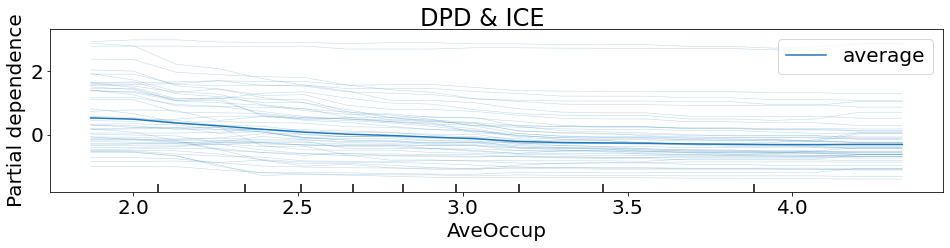

In [9]:
rcParams['figure.figsize'] = 16, 3
rcParams['font.size'] = 20
features = ["MedInc", 'AveOccup', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

for feature in features:    
    display = plot_partial_dependence(est, X_train, [feature], kind = "both", subsample=50,
           n_jobs=3, grid_resolution=20, random_state=0)

    display.figure_.suptitle("DPD & ICE")

<div class="alert alert-block alert-info">
<font color=black><br>

- The PDP (thick blue line) for the house price shows a positive linear relationship with the median income 
- The PDP (thick blue line) for the house price drops when the average occupants per household increases
- While the house age does not have a strong influence on the house price on average, there seems to be a number of exceptions (each line is the ICE) where the house price increase when between the ages 15-25. 

<br></font>
</div>

# PDP = Partial Dependence Plot 

<div class="alert alert-block alert-info">
<font color=black><br>

- The PDP **shows the marginal effect** features have on the predicted outcome.
- Max No of features is one or two.
- A PDD can show if the relationship between the target and a feature is linear, monotonic or more complex. 
- Big assumption is that all feature are not correlated. If they are results are meaningless.
- It shows only the average effect. 

<br></font>
</div>

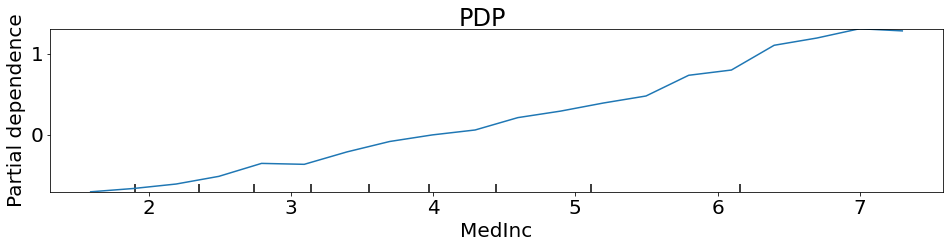

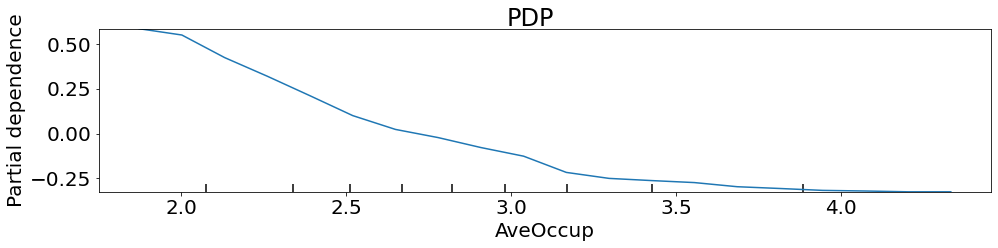

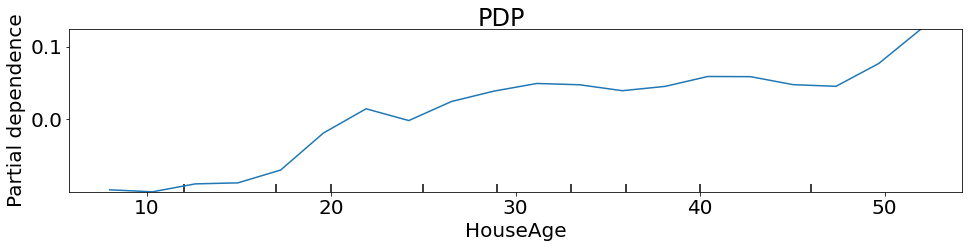

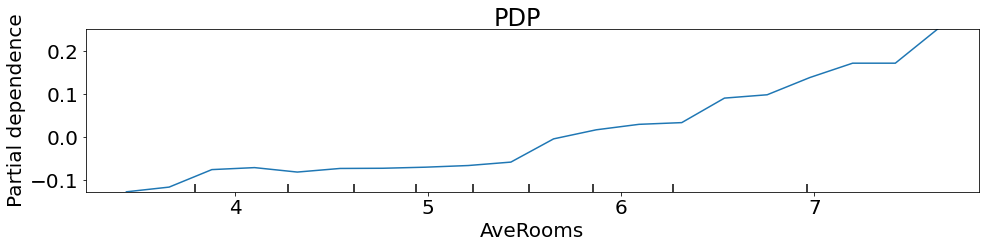

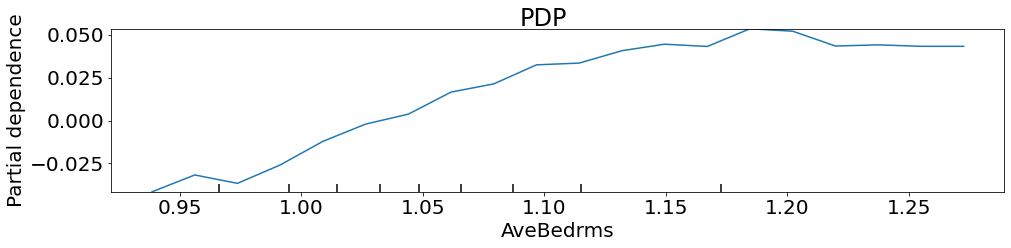

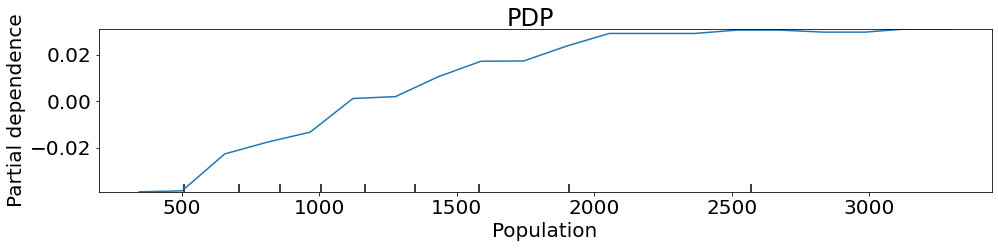

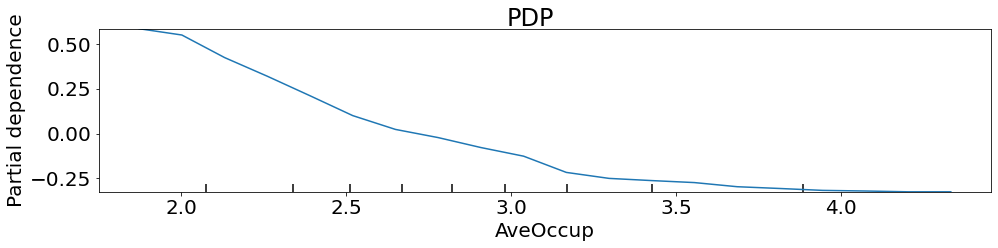

In [12]:
rcParams['figure.figsize'] = 16, 3
rcParams['font.size'] = 20
features = ["MedInc", 'AveOccup', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

for feature in features:
    fig, ax = plt.subplots()
    #display = plot_partial_dependence(est, X_train, [feature], kind = "both", subsample=50,
    #       n_jobs=3, grid_resolution=20, random_state=0)
    display = plot_partial_dependence(est, X_train, [feature], kind = "average", n_jobs=-1, grid_resolution=20,
                                      ax = ax, subsample=50)
                                  
    display.figure_.suptitle("PDP")
    #display.figure_.subplots_adjust()

# ICE = Individual Conditional Expectation

<div class="alert alert-block alert-info">
<font color=black><br>

- The equivalent to a PDP for individual data instances is called individual conditional expectation (ICE) plot.

<br></font>
</div>

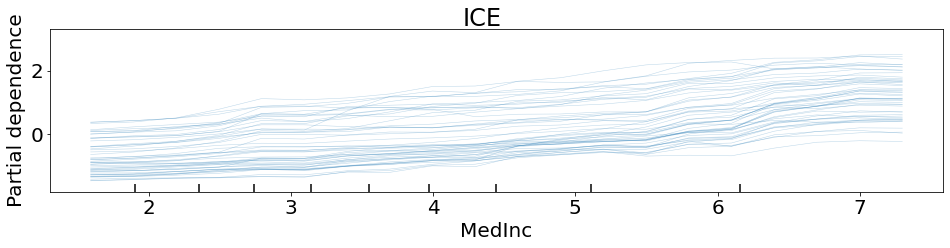

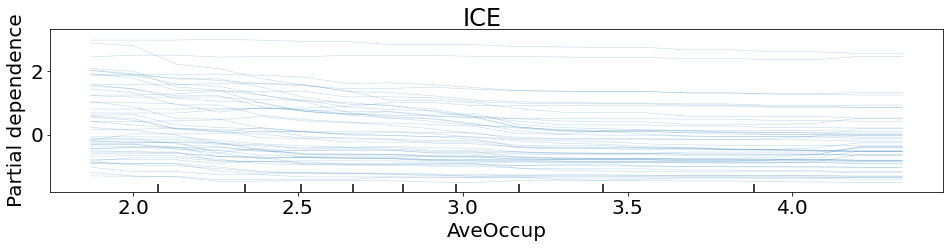

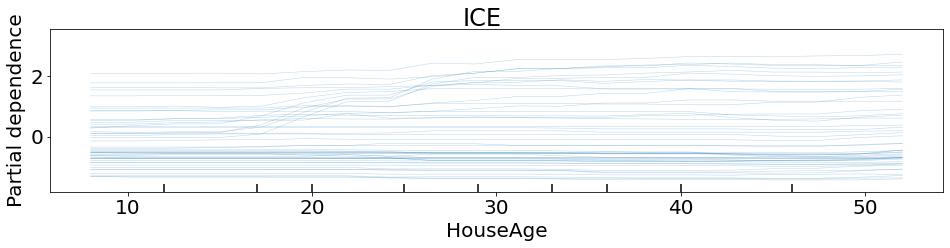

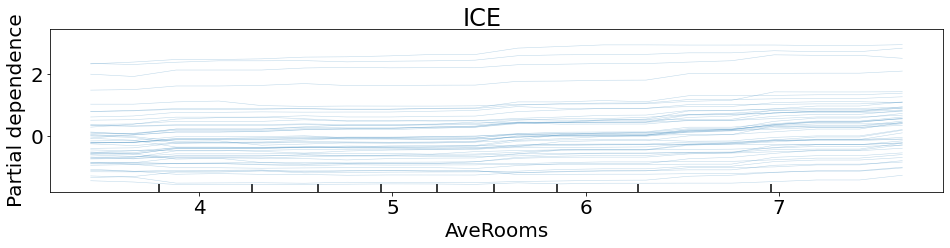

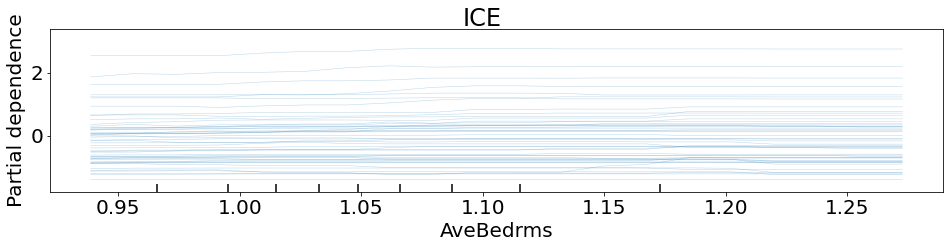

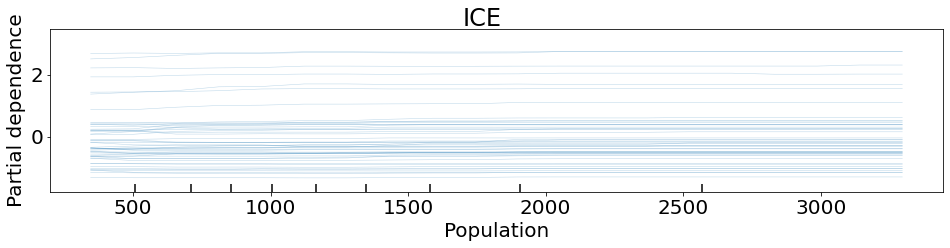

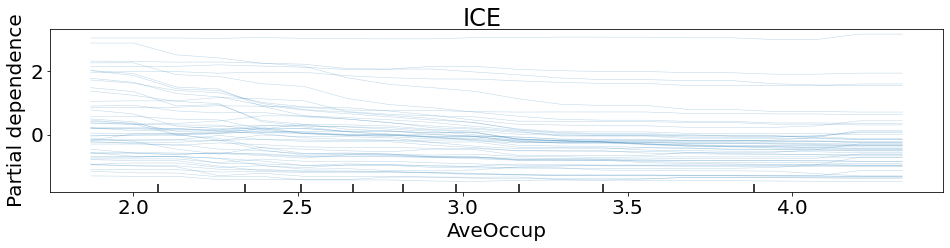

In [14]:
rcParams['figure.figsize'] = 16, 3
rcParams['font.size'] = 20
features = ["MedInc", 'AveOccup', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

for feature in features:
    fig, ax = plt.subplots()
    #display = plot_partial_dependence(est, X_train, [feature], kind = "both", subsample=50,
    #       n_jobs=3, grid_resolution=20, random_state=0)
    display = plot_partial_dependence(est, X_train, [feature], kind = "individual", n_jobs=-1, grid_resolution=20,
                                      ax = ax, subsample=50)
    display.figure_.suptitle("ICE")

# 2D plot

<div class="alert alert-block alert-info">
<font color=black><br>

- PDPs with two features of interest enable us to visualize interactions among them. 
- However, ICEs cannot be plotted  in an easy manner and thus interpreted. 
- Another consideration is linked to the performance to compute the PDPs. 
- With the tree-based algorithm, when only PDPs are requested, they can be computed on an efficient way using the 'recursion' method. 

<br></font>
</div>

done in 0.983s


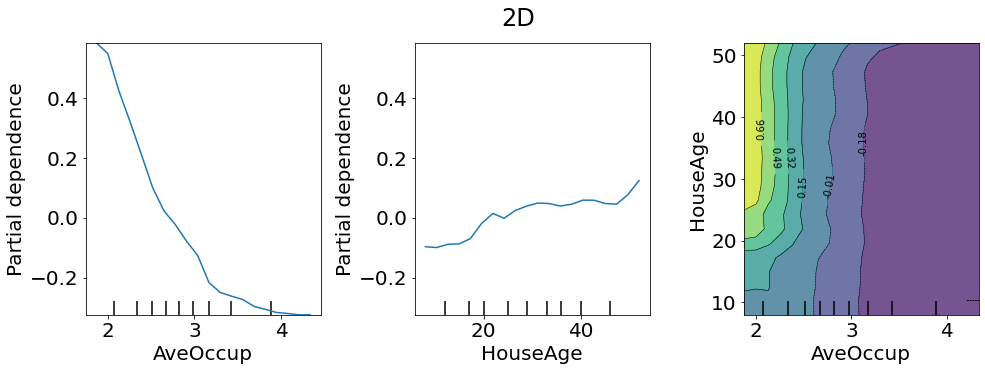

In [16]:
features = ['AveOccup', 'HouseAge', ('AveOccup', 'HouseAge')]
tic = time()

rcParams['figure.figsize'] = 16, 5
rcParams['font.size'] = 20
_, ax = plt.subplots(ncols=3)
display = plot_partial_dependence(
    est, X_train, features, kind='average', n_jobs=-1, grid_resolution=20,
    ax=ax,
)
print(f"done in {time() - tic:.3f}s")
display.figure_.suptitle("2D")
display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)

<div class="alert alert-block alert-info">
<font color=black><br>

- The two-way partial dependence plot shows the dependence of median house price on joint values of house age and average occupants per household. 
- We can clearly see an interaction between the two features: for an average occupancy greater than two, the house price is nearly independent of the house age, whereas for values less than 2 there is a strong dependence on age.

<br></font>
</div>

# 3D plot

<div class="alert alert-block alert-info">
<font color=black><br>

- Let’s make the same partial dependence plot for the 2 features interaction, this time in 3 dimensions. 

<br></font>
</div>

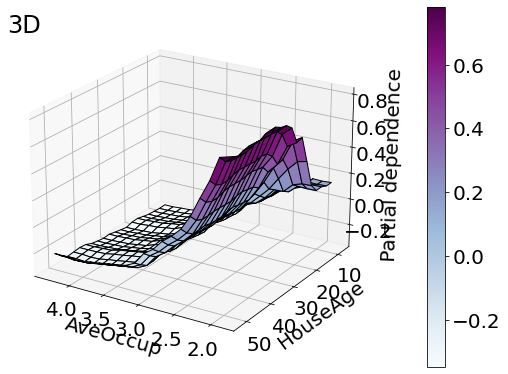

In [19]:
fig = plt.figure(figsize=(16, 5))
features = ('AveOccup', 'HouseAge')
pdp = partial_dependence(
    est, X_train, features=features, kind='average', grid_resolution=20
)
XX, YY = np.meshgrid(pdp["values"][0], pdp["values"][1])
Z = pdp.average[0].T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                       cmap=plt.cm.BuPu, edgecolor='k')
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel('Partial dependence')
# pretty init view
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.suptitle('3D')
plt.subplots_adjust(top=0.9)
plt.show()

# References

<div class="alert alert-block alert-warning">
<font color=black><br>

- https://scikit-learn.org/stable/auto_examples/inspection/plot_partial_dependence.html#sphx-glr-auto-examples-inspection-plot-partial-dependence-py<br> 
- https://christophm.github.io/interpretable-ml-book/pdp.html 

<br></font>
</div>    